In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

In [2]:
!pip3 install catboost



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.4 MB/s eta 0:00:00


In [4]:
!gdown --id 1KXxSQvHfw4ho2WW3atcMzI2_9BZJt4b5

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KXxSQvHfw4ho2WW3atcMzI2_9BZJt4b5
To: /content/kddcup.data_10_percent
100% 74.9M/74.9M [00:01<00:00, 42.2MB/s]


In [5]:
#loading the dataset 10 percent of kdd cup99
df_names =['duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds' ,
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate' ,
'same_srv_rate' ,
'diff_srv_rate',
'srv_diff_host_rate' ,
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate' ,
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
           'prediction']

df = pd.read_csv('/content/kddcup.data_10_percent', header = None)

df.columns = df_names
df.head()
#dropping unused columns :
df.drop(columns = ['duration',
'protocol_type','flag','dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds' ,
'is_host_login',
'is_guest_login','serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate' ,
'same_srv_rate' ,
'diff_srv_rate','dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate' ,'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate'],inplace=True)
df.sample(20)


,service,src_bytes,count,srv_count,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,prediction
292916,ecr_i,1032,511,511,0.00,255,255,0.00,0.0,smurf.
14376,http,239,4,4,0.00,4,255,0.04,0.0,normal.
422695,ecr_i,520,511,511,0.00,255,255,0.00,0.0,smurf.
202362,ecr_i,1032,510,510,0.00,255,255,0.00,0.0,smurf.
474181,private,0,244,18,0.00,255,18,0.00,1.0,neptune.
54116,private,0,112,1,0.00,255,1,0.00,0.0,neptune.
328574,ecr_i,1032,511,511,0.00,255,255,0.00,0.0,smurf.
370829,ecr_i,1032,511,511,0.00,255,255,0.00,0.0,smurf.
103220,ecr_i,1032,511,511,0.00,255,255,0.00,0.0,smurf.
294190,ecr_i,1032,511,511,0.00,255,255,0.00,0.0,smurf.


In [26]:
'''
df_maj = df[df['prediction']=='smurf.']
df_min1 = df[df['prediction']=='back.']


df_normal_upsample = resample(df_min , replace =True , n_samples=120000 ,random_state=42)

df_upsampled = pd.concat([df_min_upsample , df])
df_upsampled.value_counts()'''

NameError: name 'df_min' is not defined

In [37]:
from sklearn.utils import resample


df_maj = df[df['prediction']=='smurf.']
df_minnormal = df[df['prediction']=='normal.']
df_minback = df[df['prediction']=='back.']
df_minneptune = df[df['prediction']=='neptune.']
df_minsatan = df[df['prediction']=='satan.']
df_minipsweep = df[df['prediction']=='ipsweep.']
df_minportsweep = df[df['prediction']=='portsweep.']
df_minwarz = df[df['prediction']=='warezclient.']


df_normal_upsample = resample(df_minnormal , replace =True , n_samples=150000 ,random_state=42)
df_satan_upsample = resample(df_minsatan , replace =True , n_samples=100000 ,random_state=42)
df_neptune_upsample = resample(df_minneptune , replace =True , n_samples=220000 ,random_state=42)
df_back_upsample = resample(df_minback , replace =True , n_samples=200000 ,random_state=42)
df_ipsweep_upsample = resample(df_minnormal , replace =True , n_samples=100000 ,random_state=42)
df_portsweep_upsample = resample(df_minnormal , replace =True , n_samples=50000 ,random_state=42)
df_warz_upsample = resample(df_minnormal , replace =True , n_samples=50000 ,random_state=42)

df_upsampled = pd.concat([df_normal_upsample, df_satan_upsample,df_neptune_upsample,df_back_upsample,df_ipsweep_upsample,df_portsweep_upsample,df_warz_upsample, df_maj])


In [39]:
X = pd.DataFrame(df_upsampled.iloc[:,:-1])
y = pd.DataFrame(df_upsampled.iloc[:,-1])
X.sample(20)
y.sample(10)
y.value_counts()
src = df['src_bytes'].unique()
df.sample(20)

prediction
normal.       350000
smurf.        280790
neptune.      220000
back.         200000
satan.        100000
Name: count, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(x_train.sample(10))
print("Class distribution in training set:")
print(y_train.value_counts())




NameError: name 'x_train' is not defined

In [ ]:
import gc
gc.collect()

27

In [ ]:
#some stats about our dataset :

X.head(20)
# Get the frequency of each service type
service_counts = X['service'].value_counts()

# Print the frequency of each service type
print("Service types and their frequencies:")
print(service_counts)


unique_services = X['service'].unique()

# Print the unique service types
print("Unique service types:")
print(unique_services)

X.info()

y.info()



Service types and their frequencies:
service
ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: count, Length: 66, dtype: int64
Unique service types:
['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'ftp_data' 'rje' 'time' 'mtp' 'link'
 'remote_job' 'gopher' 'ssh' 'name' 'whois' 'domain' 'login' 'imap4'
 'daytime' 'ctf' 'nntp' 'shell' 'IRC' 'nnsp' 'http_443' 'exec' 'printer'
 'efs' 'courier' 'uucp' 'klogin' 'kshell' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'hostnames' 'csnet_ns' 'pop_2' 'sunrpc' 'uucp_path'
 'netbios_ns' 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50'
 'ldap' 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tftp_u' 'tim_i' 'red_i']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 9 columns):
 #   Col

<Axes: >

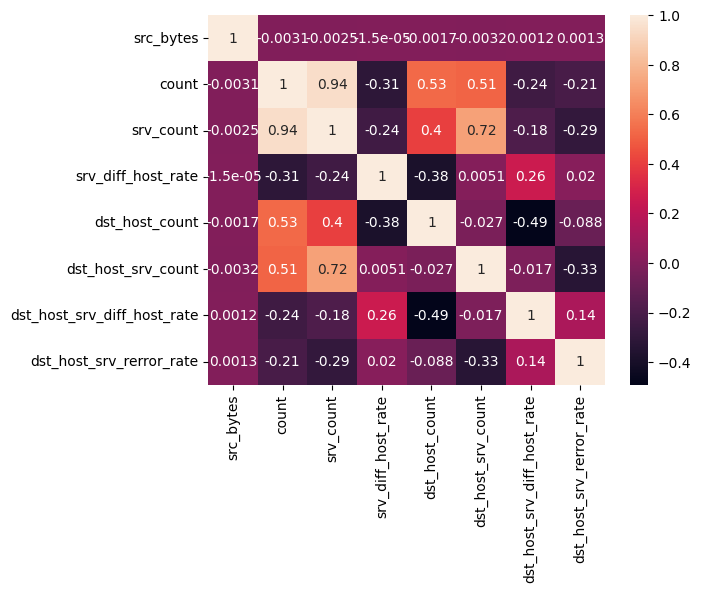

In [ ]:
#visulization
X_visu = X.drop(['service'] , axis =1 )
sns.heatmap(X_visu.corr() , annot = True)


In [41]:
train_pool = Pool(data=X_train, label=y_train, cat_features=[0])


In [42]:
# Initialize CatBoostClassifier
model = CatBoostClassifier(eval_metric='AUC' , iterations= 30)

# Train the model
model.fit(train_pool)


Learning rate set to 0.5
0:	total: 1.86s	remaining: 54s
1:	total: 3.53s	remaining: 49.5s
2:	total: 5.19s	remaining: 46.7s
3:	total: 7.69s	remaining: 50s
4:	total: 10.4s	remaining: 51.8s
5:	total: 12s	remaining: 48.2s
6:	total: 13.7s	remaining: 45.1s
7:	total: 15.4s	remaining: 42.3s
8:	total: 17s	remaining: 39.7s
9:	total: 18.6s	remaining: 37.3s
10:	total: 20.5s	remaining: 35.4s
11:	total: 23.4s	remaining: 35.1s
12:	total: 25.3s	remaining: 33.1s
13:	total: 26.9s	remaining: 30.8s
14:	total: 28.6s	remaining: 28.6s
15:	total: 30.2s	remaining: 26.4s
16:	total: 31.9s	remaining: 24.4s
17:	total: 35.2s	remaining: 23.5s
18:	total: 38s	remaining: 22s
19:	total: 39.7s	remaining: 19.8s
20:	total: 41.4s	remaining: 17.7s
21:	total: 43s	remaining: 15.7s
22:	total: 44.7s	remaining: 13.6s
23:	total: 46.4s	remaining: 11.6s
24:	total: 48.1s	remaining: 9.61s
25:	total: 50.8s	remaining: 7.81s
26:	total: 52.9s	remaining: 5.88s
27:	total: 54.5s	remaining: 3.9s
28:	total: 56.2s	remaining: 1.94s
29:	total: 57.

In [23]:
y_pred_proba = model.predict_proba(X_test)
# Convert target labels to numeric values
y_test_categorical = pd.Categorical(y_test)
y_test_encoded = y_test_categorical.codes

# Calculate AUC score
auc_score = roc_auc_score(y_test_encoded, y_pred_proba, multi_class='ovr')
print(f'AUC Score: {auc_score}')

ValueError: Number of classes in y_true not equal to the number of columns in 'y_score'

In [ ]:

# Save the trained model to a file
with open('catboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)



In [ ]:
#load the model

with open('/content/catboost_model999.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [44]:
testing = pd.read_csv('features.csv')
testing.iloc[11]
prediction = model.predict(testing)
preds = pd.DataFrame (prediction)
preds.shape
services = testing['service']
preds['service'] = services
pred_csv = preds.to_csv('pred_csv')
